In [195]:
import pickle
import numpy as np
from random import shuffle
import requests
import math
from datetime import datetime
import operator
from sklearn import datasets, linear_model, svm, manifold
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.font_manager import FontProperties
import pylab
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN

In [69]:
f = open('../Results/Pickles/member_names.pickle', 'rb')
member_names = pickle.load(f)
f.close()

In [70]:
f = open('../Results/Pickles/edge_details.pickle', 'rb')
edge_details = pickle.load(f)
f.close()

In [71]:
f = open('../Data/parties.csv', 'r')

parties = f.readlines()
parties = [p.strip() for p in parties]

f.close()

In [72]:
f = open('../Results/Pickles/member_details.pickle', 'rb')
member_details = pickle.load(f)
f.close()

In [73]:
f = open('../Results/Pickles/debate_details.pickle', 'rb')
debate_details = pickle.load(f)
f.close()

In [74]:
alliances = ['UPA', 'NDA', 'TF', 'Others']

party_alliance = {'INC':'UPA', 'DMK':'Others', 'J&KNC':'UPA', 'CPI(M)':'TF', 'SS':'NDA', 'AITC':'UPA', 'BJP':'NDA',\
                  'IUML':'UPA', 'AIUDF':'Others', 'SAD':'NDA', 'AIADMK':'TF', 'SP':'Others', 'RLD':'UPA', 'JMM':'NDA',\
                  'BSP':'TF', 'HJC':'NDA', 'NCP':'UPA', 'BPF':'NDA', 'NPF':'UPA', 'JD(U)':'Others', 'CPI':'TF',\
                  'JD(S)':'TF', 'MDMK':'TF', 'BVA':'Others', 'BJD':'TF', 'Ind.':'Others', 'JVM (P)':'Others',\
                  'RJD':'Others', 'AIFB':'TF', 'RSP':'TF', 'KC(M)':'UPA', 'TDP':'TF', 'AIMIM':'Others', 'SDF':'NDA',\
                  'TRS':'NDA', 'YSR Congress Party':'Others', 'SWP':'Others', 'VCK':'Others', 'AGP':'NDA'}


# Features : Number of times member participated in debate

In [76]:
individual_interaction = {}

for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            if participant in individual_interaction:
                individual_interaction[participant] += 1
            else:
                individual_interaction[participant] = 1

In [77]:
data = []

for i in range(len(member_names)):
    if member_names[i] in individual_interaction:
        data.append(individual_interaction[member_names[i]])
    else:
        data.append(0)

In [78]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(data).reshape(-1, 1))

In [79]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [80]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

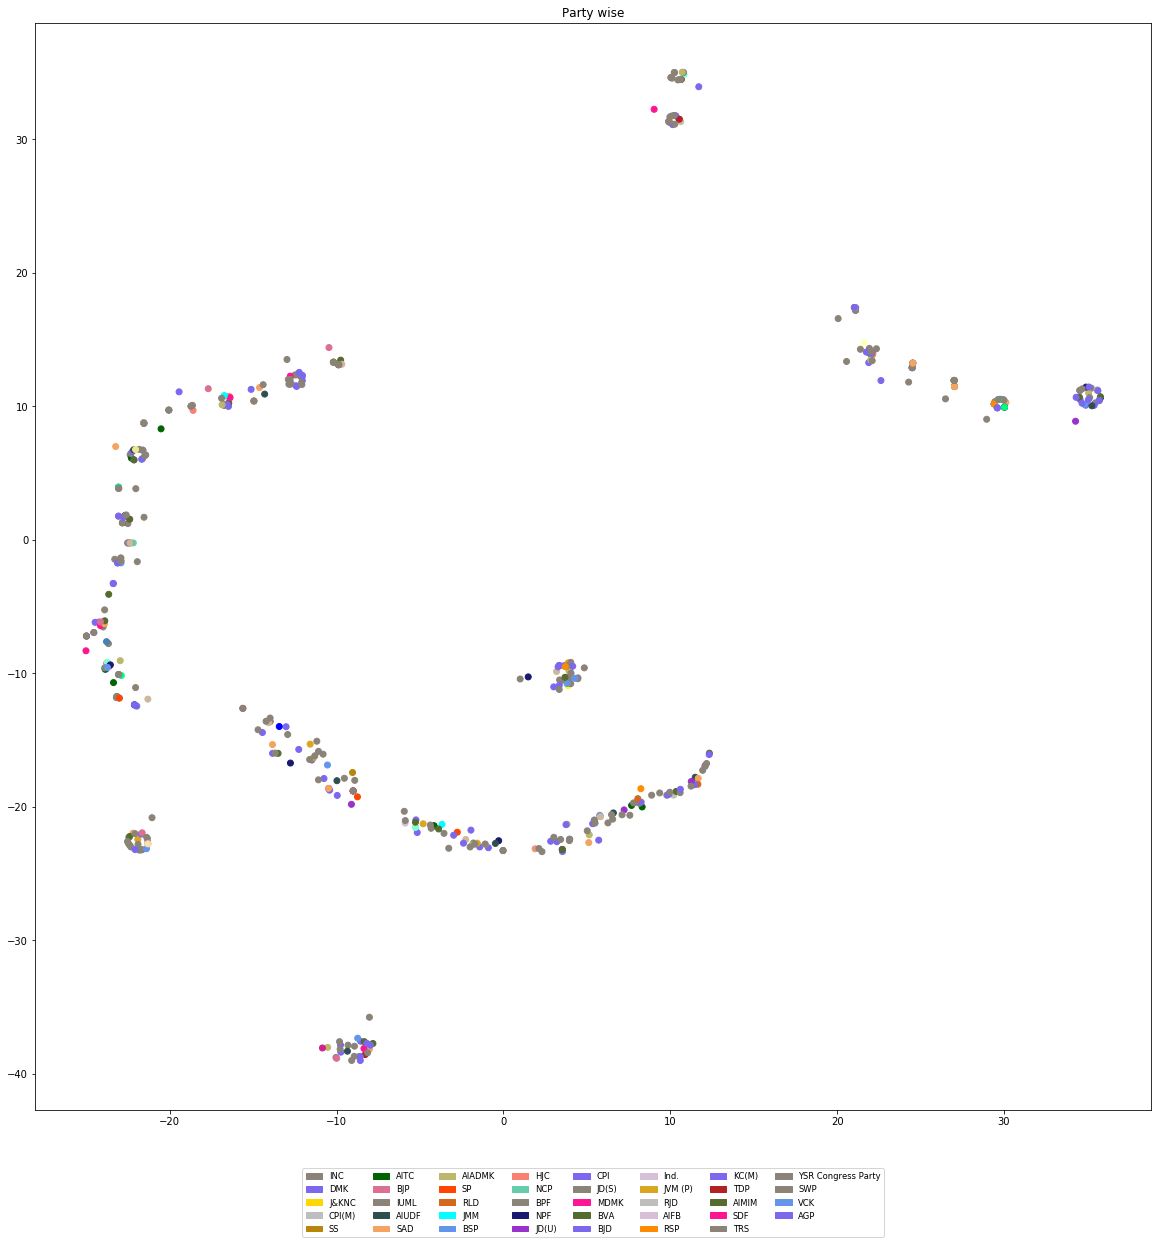

In [81]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Organizing by alliance

In [82]:
color_map = {'UPA':'red', 'NDA':'blue', 'TF':'green', 'Others':'black'}

member_colors = []

for i in range(len(member_names)):
    member_colors.append(color_map[party_alliance[member_details[member_names[i]][0]]])

In [83]:
legend_list = []

for rec in color_map:
    legend_list.append(mpatches.Patch(color = color_map[rec], label = rec))
    
fontp = FontProperties()
fontp.set_size('small')

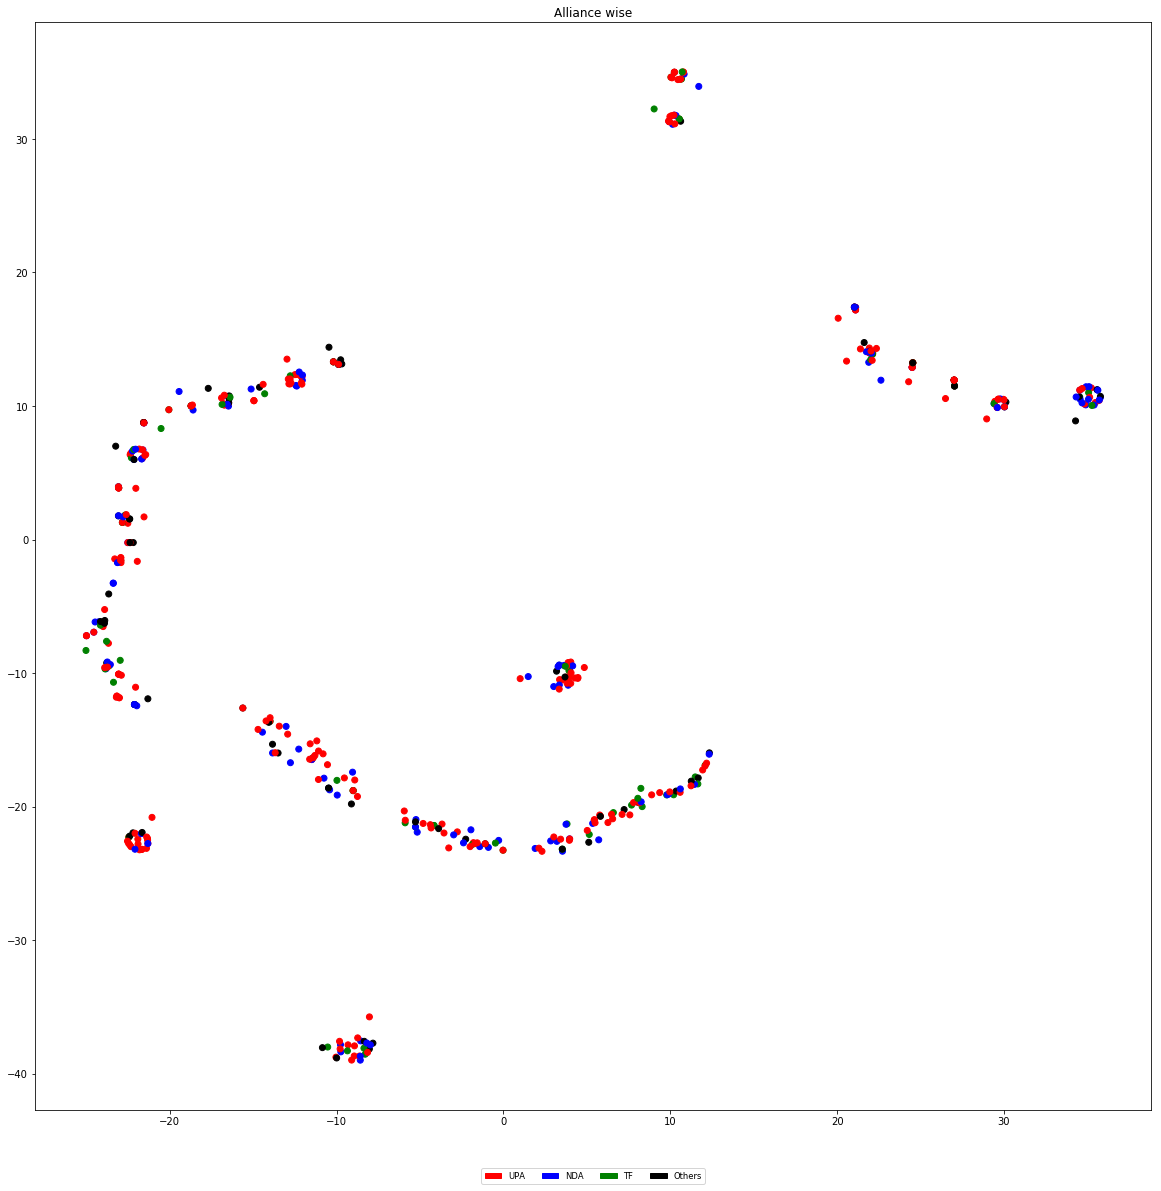

In [84]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Alliance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

# Features: Number of times member participated + Number of types of debates member participated in

In [86]:
member_debate_type = {}

for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            if participant in member_debate_type:
                member_debate_type[participant].add(debate)
            else:
                member_debate_type[participant] = set([debate])

In [87]:
data = []

for i in range(len(member_names)):
    if member_names[i] in individual_interaction:
        data.append([individual_interaction[member_names[i]], len(member_debate_type[member_names[i]])])
    else:
        data.append([0, 0])

In [88]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(data))

In [89]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [90]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

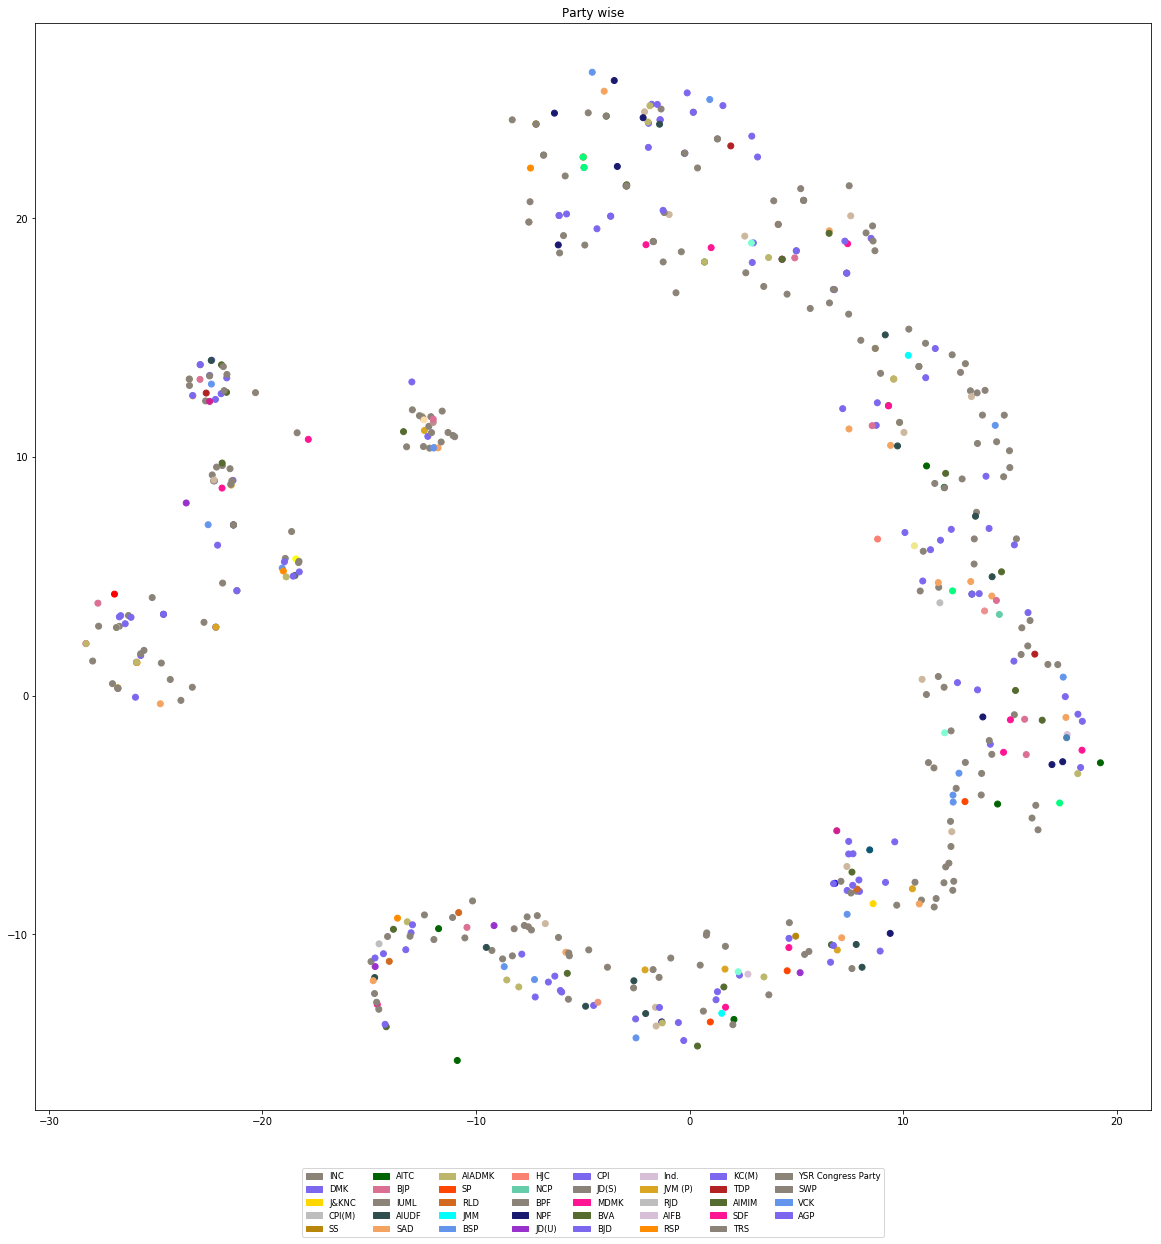

In [91]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Organizing by alliance

In [92]:
color_map = {'UPA':'red', 'NDA':'blue', 'TF':'green', 'Others':'black'}

member_colors = []

for i in range(len(member_names)):
    member_colors.append(color_map[party_alliance[member_details[member_names[i]][0]]])

In [93]:
legend_list = []

for rec in color_map:
    legend_list.append(mpatches.Patch(color = color_map[rec], label = rec))
    
fontp = FontProperties()
fontp.set_size('small')

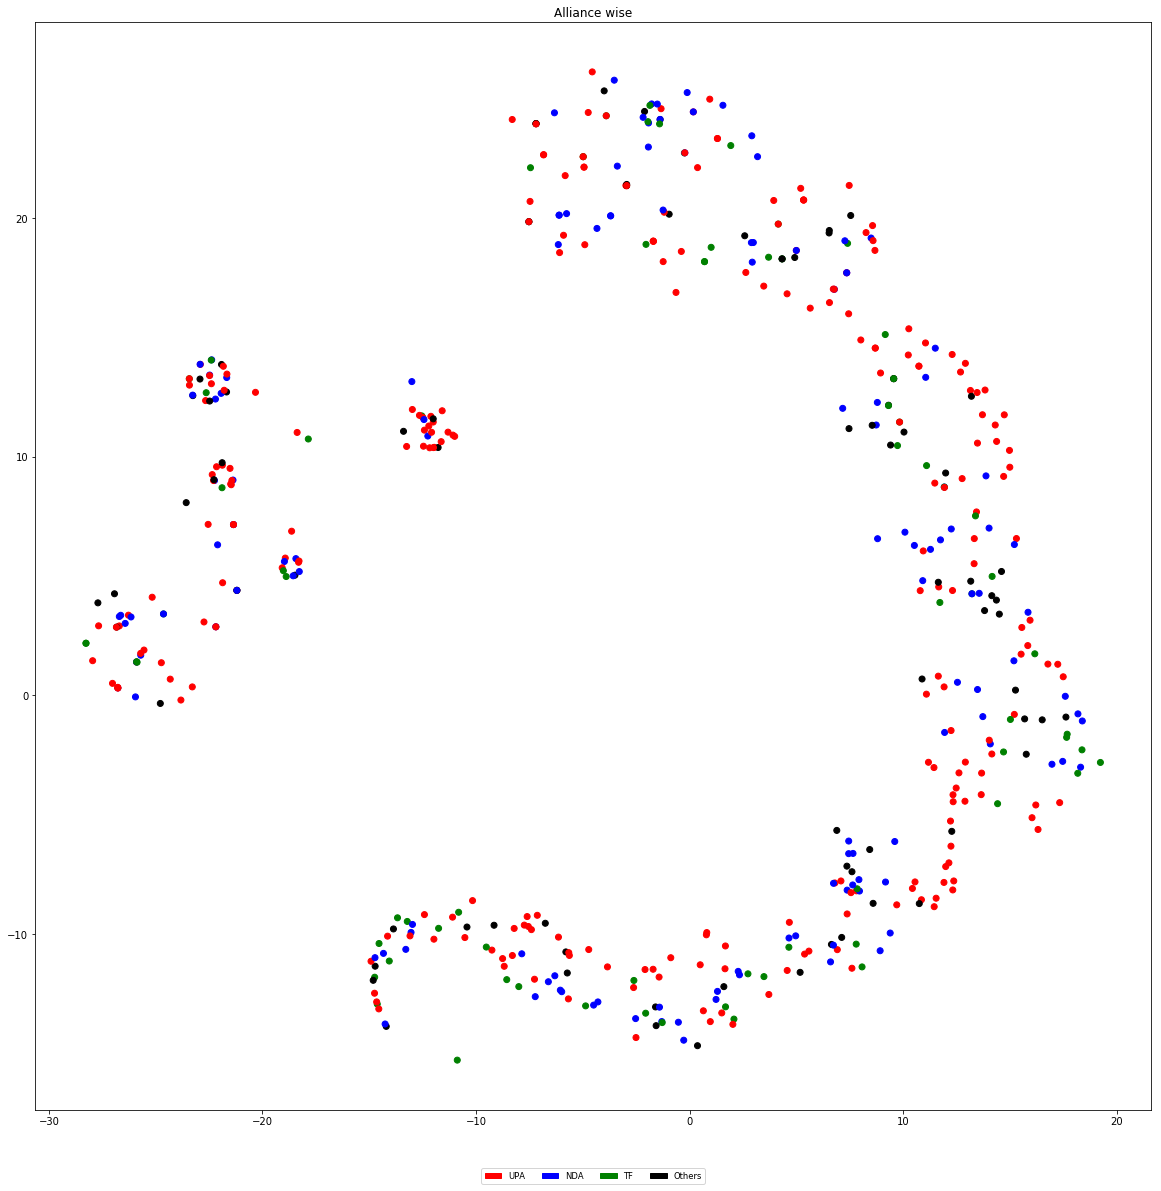

In [94]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Alliance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Features: Number of times member participated + Number of types of debates member participated in + Number of keywords member used

In [95]:
member_keywords = {}

for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            keywords = set([])
            for word in rec[2]:
                if word == '':
                    continue
                keywords.add(word)
            if participant in member_keywords:
                member_keywords[participant] |= keywords
            else:
                member_keywords[participant] = keywords

In [96]:
data = []

for i in range(len(member_names)):
    if member_names[i] in individual_interaction:
        data.append([individual_interaction[member_names[i]], len(member_debate_type[member_names[i]]), len(member_keywords[member_names[i]])])
    else:
        data.append([0, 0, 0])

In [97]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(data))

In [98]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [99]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

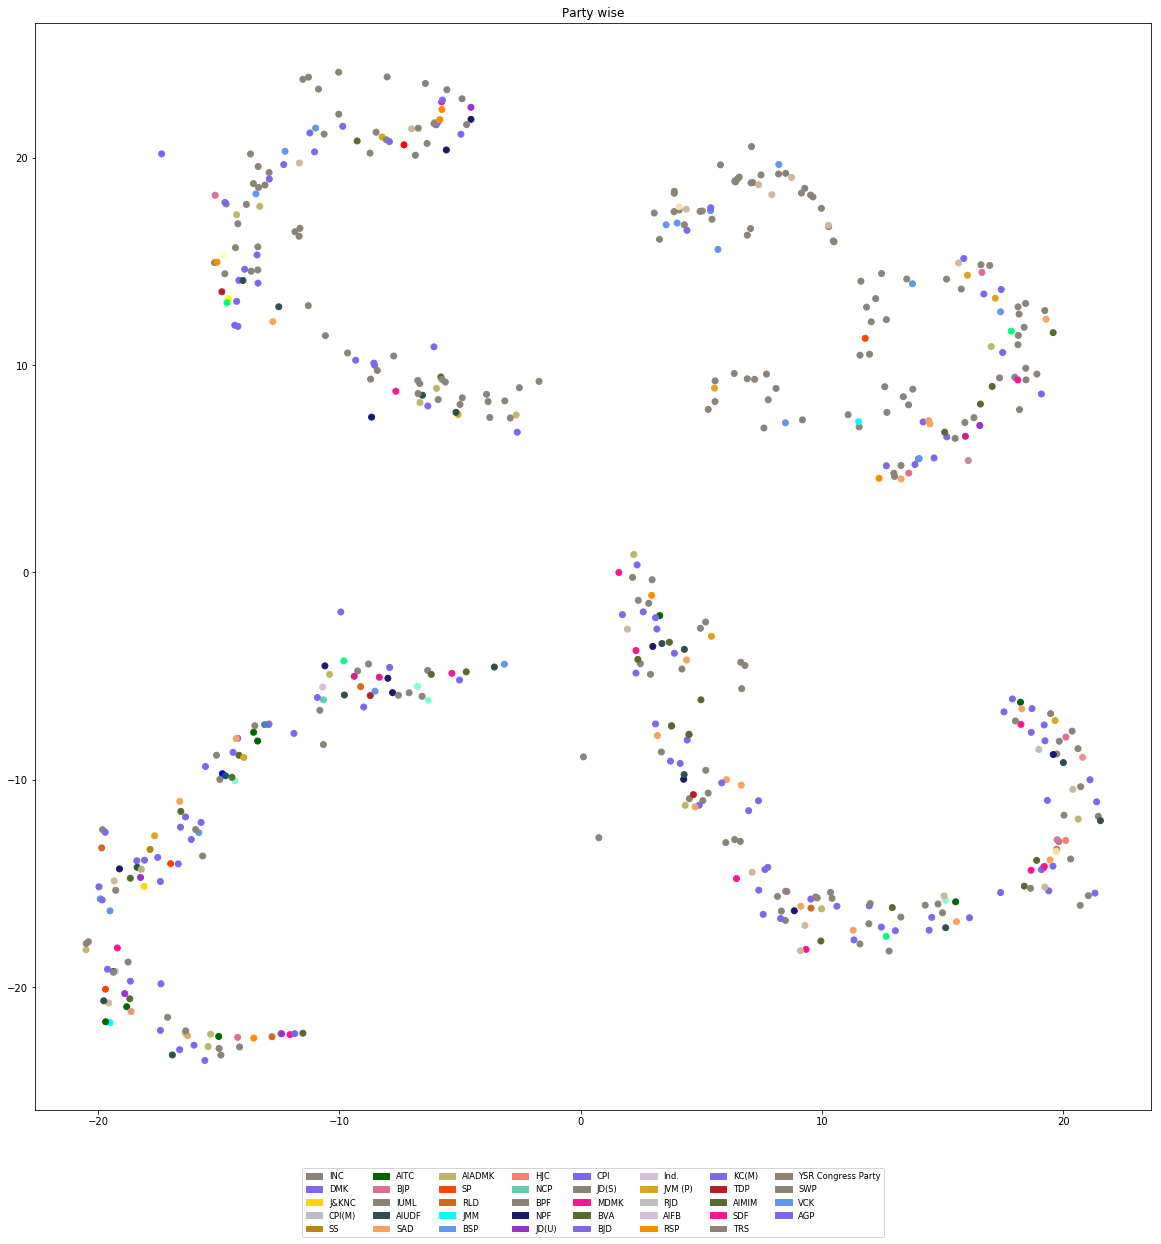

In [100]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Organizing by alliance

In [101]:
color_map = {'UPA':'red', 'NDA':'blue', 'TF':'green', 'Others':'black'}

member_colors = []

for i in range(len(member_names)):
    member_colors.append(color_map[party_alliance[member_details[member_names[i]][0]]])

In [102]:
legend_list = []

for rec in color_map:
    legend_list.append(mpatches.Patch(color = color_map[rec], label = rec))
    
fontp = FontProperties()
fontp.set_size('small')

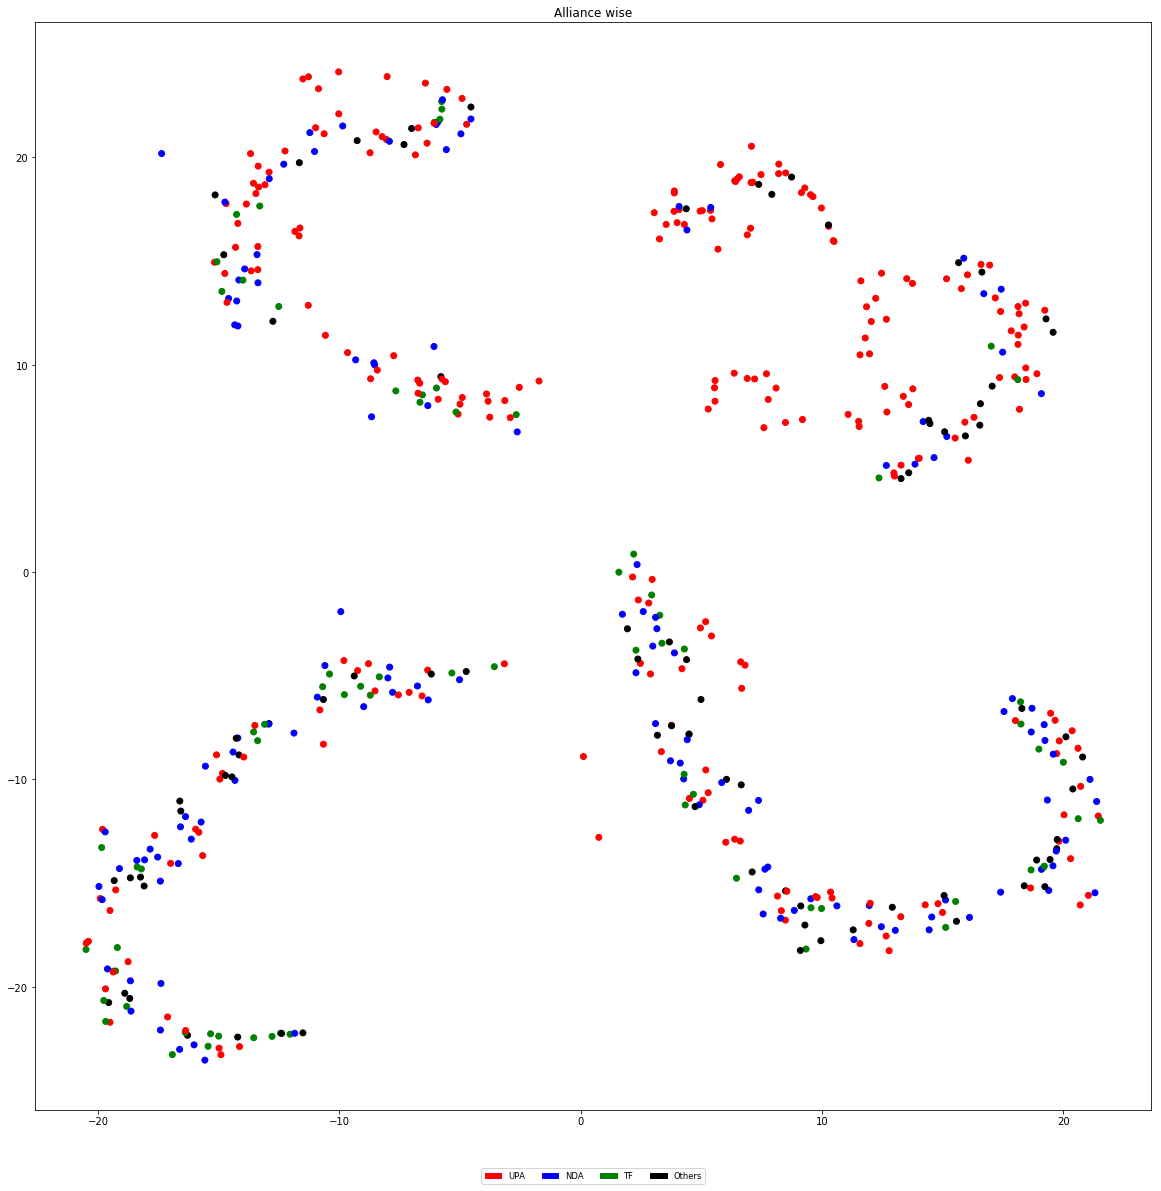

In [103]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Alliance wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Measuring similarities based on qualitative data

In the above blocks of code, we tried to measure similarities between members based on the number of interactions, debates and keywords used in the debates.

Now, we use one-hot vectors to specify exactly which keyword they talked about, and when they talked in the Parliament. This will give us a better estimate of who is closer to whom.

In [104]:
all_keywords = set([])
all_timestamps = set([])

for debate in debate_details:
    for rec in debate_details[debate]:
        all_timestamps.add(rec[1])
        all_keywords |= rec[2]
        
all_keywords.remove('')

In [105]:
all_keywords = list(all_keywords)
all_timestamps = list(all_timestamps)

In [124]:
member_vector = [[0 for x in range(len(all_keywords) + len(all_timestamps))] for y in range(len(member_names))]
m = len(all_keywords)
n = len(all_timestamps)

for debate in debate_details:
    for rec in debate_details[debate]:
        for participant in rec[0]:
            try:
                member_vector[member_names.index(participant)][m + all_timestamps.index(rec[1])] = 1
                for word in rec[2]:
                    if word == '':
                        continue
                    member_vector[member_names.index(participant)][all_keywords.index(word)] = 1
            except ValueError:
                continue

## Using truncatedSVD to reduce number of dimensions to 2

In [149]:
model = TruncatedSVD(n_components=2, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [150]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [151]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

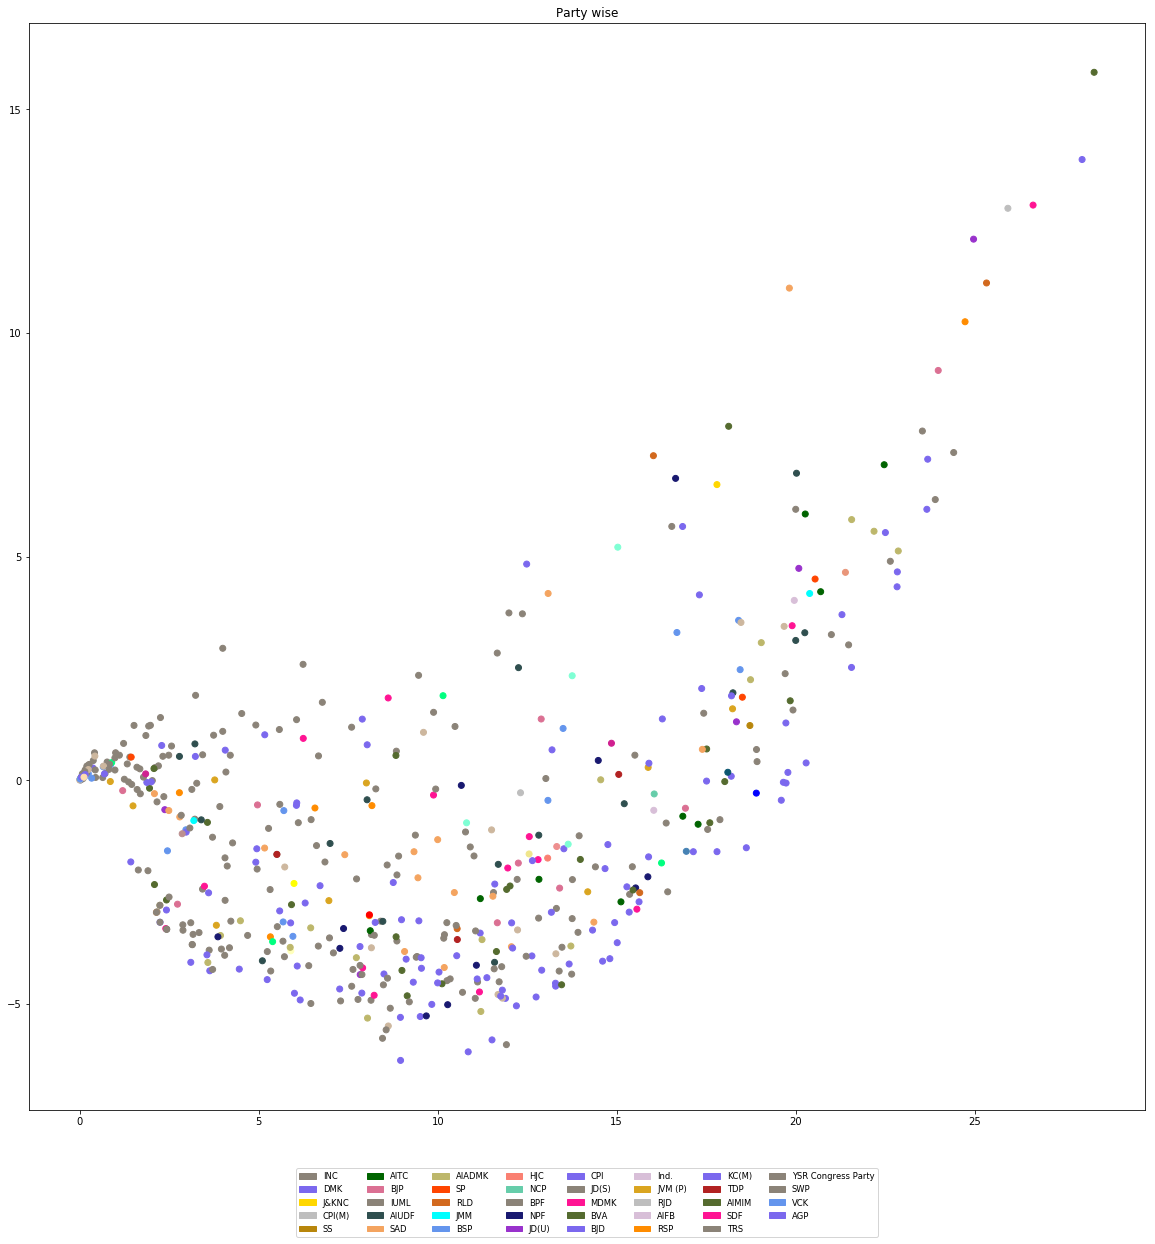

In [152]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in transformed_features], [x[1] for x in transformed_features], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using tSNE to reduce number of dimensions to 2

In [184]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(member_vector))

In [185]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [186]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

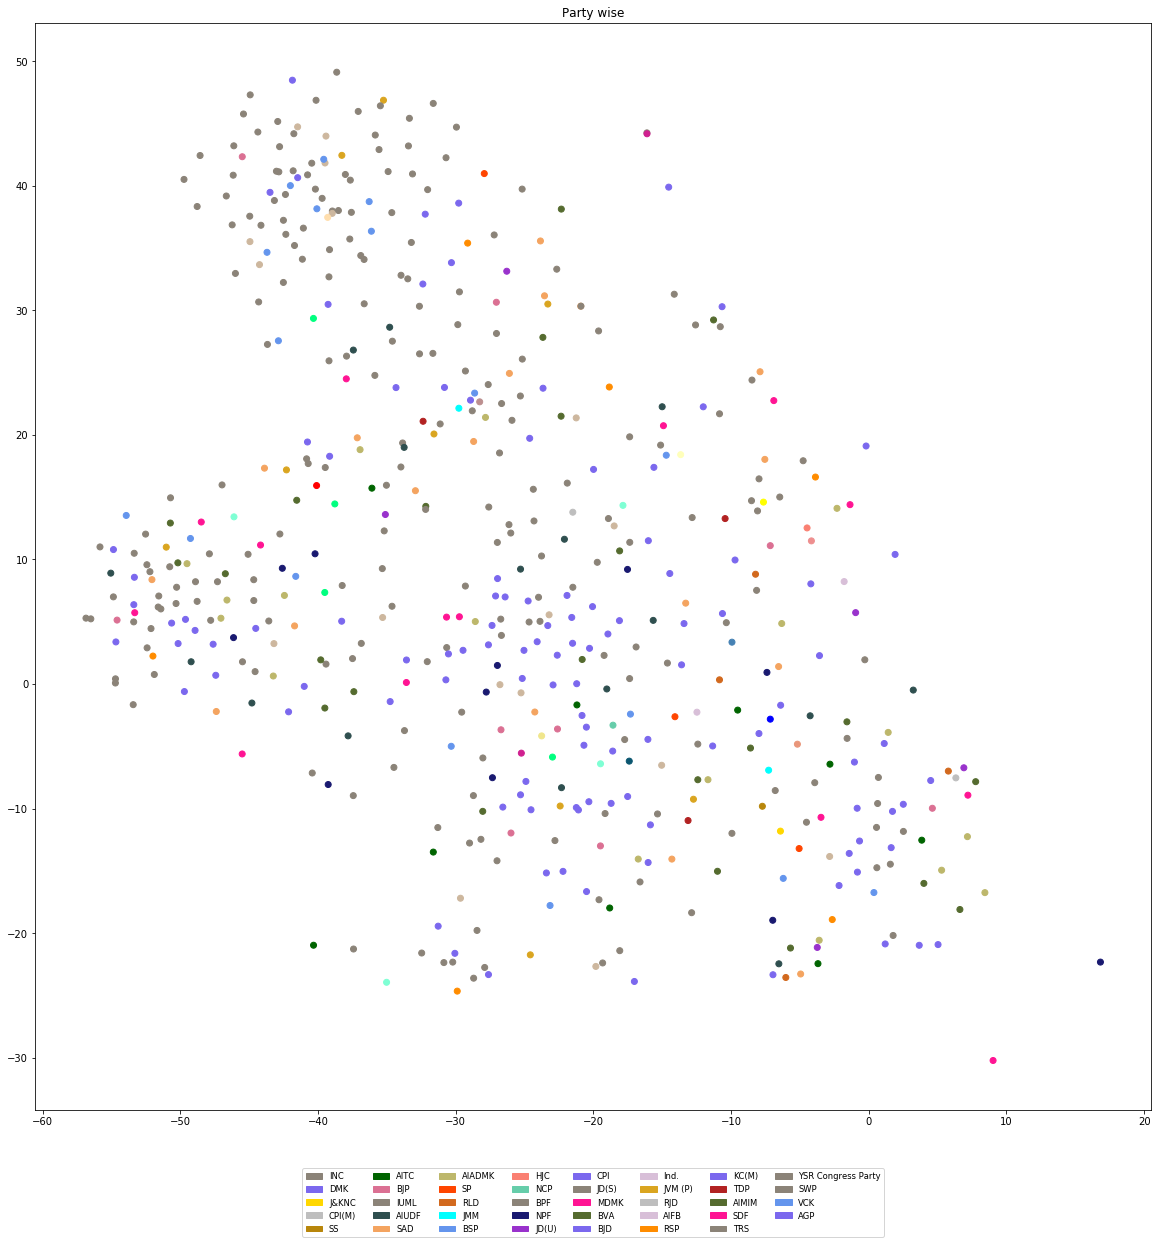

In [187]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

## Using truncatedSVD to reduce number of dimensions to 30 and then using tSNE to reduce the number of dimensions to 2

In [188]:
model = TruncatedSVD(n_components=30, n_iter=7, random_state=42)
transformed_features = model.fit_transform(member_vector)

In [189]:
model = manifold.TSNE()
coordinates = model.fit_transform(np.array(transformed_features))

In [190]:
colors = ['#8b8378', '#cdb79e', '#ff4500', '#2f4f4f', '#191970', '#6495ed', '#7b68ee', '#00ffff', '#66cdaa', '#7fffd4', '#006400', '#556b2f', '#00ff7f', '#f0e68c', '#bdb76b', '#ffff00', '#daa520', '#b8860b', '#bc8f8f', '#f4a460', '#d2691e', '#b22222', '#4682b4', '#ff0000', '#ff1493', '#db7093', '#d02090', '#9932cc', '#d8bfd8', '#bebebe', '#0000ff', '#ff8c00', '#ffd700', '#e9967a', '#ffdead', '#ffffbb','#ee8f8f', '#0b5670', '#fa8072']

member_colors = []

for i in range(len(member_names)):
    member_colors.append(colors[parties.index(member_details[member_names[i]][0])])

In [191]:
legend_list = []

for i in range(len(parties)):
    legend_list.append(mpatches.Patch(color = member_colors[i], label = parties[i]))
    
fontp = FontProperties()
fontp.set_size('small')

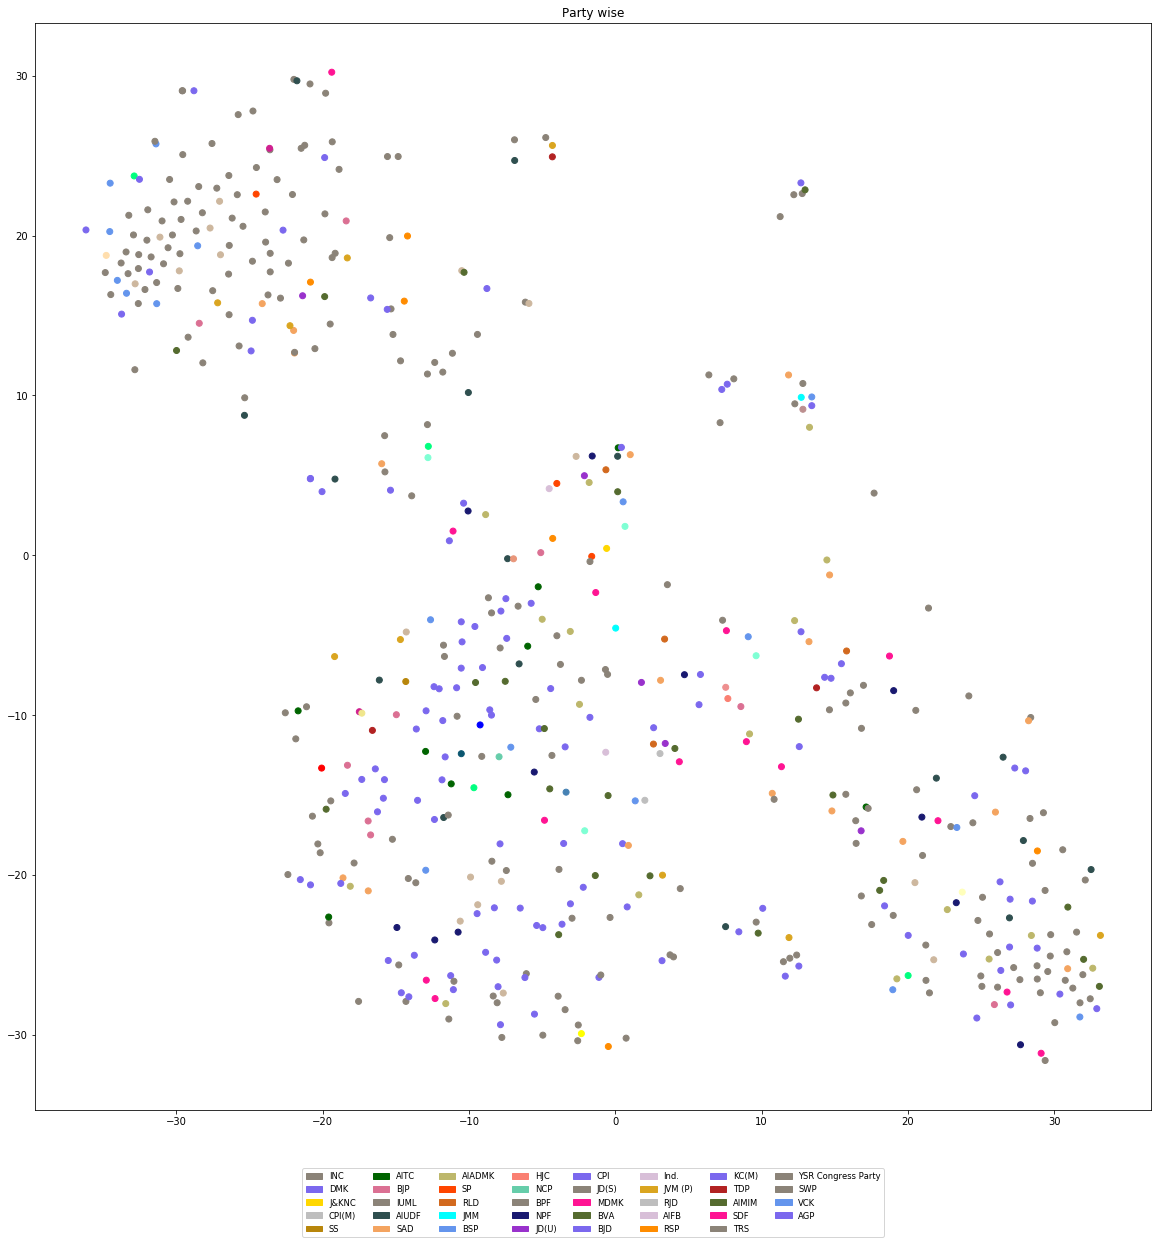

In [192]:
pylab.figure(1, figsize=(20,20))

fontp = FontProperties()
fontp.set_size('small')

plt.scatter([x[0] for x in coordinates], [x[1] for x in coordinates], c=member_colors)
plt.legend(handles = legend_list, loc = 'upper center', bbox_to_anchor = (0.5, -0.05), prop = fontp, ncol = 8)
plt.title('Party wise')

# Uncomment this part to see labels

#for i in range(len(member_names)):
#    xy = (coordinates[i][0],coordinates[i][1])
#    plt.annotate(i, xy)
    
plt.show()

# DBScan